#**Lab 5: Classification using Decision Trees**

*Enter the name and roll numbers of the team members:*

>  **Name** : Italiya Prisha

>  **Roll Number** : 142301011

>  **Name** : Gupta Ankit Vinodkumar

>   **Roll Number** : 112301010

In this lab, you will implement a **Decision tree classifier** using the **scikit-learn** library, to predict the survival of passengers who travelled in the Titanic.

The dataset comprises of *1309* observations and *10* features.

> `pclass`: Ticket class indicating the socio-economic status of the passenger. It is categorized into three classes: 1 = Upper, 2 = Middle, 3 = Lower.

>`gender`: The gender of the passenger, denoted as either male (0) or female (1)

> `age`: The age of the passenger in years

>`sibsp`: The number of siblings or spouses aboard the Titanic for the respective passenger

> `parch` : The number of parents or children aboard the Titanic for the respective passenger

> `fare` : The fare paid by the passenger for the ticket

> `embarked_C` : A binary indicator that shows whether the passenger embraked from the Cherbourg port (1) or not (0)

> `embarked_Q` : A binary indicator that shows whether the passenger embraked from the Queenstown port (1) or not (0)

> `embarked_S` : A binary indicator that shows whether the passenger embraked from the Southampton port (1) or not (0)

> `survived` : A binary indicator that shows whether the passenger survived (1) or not (0) during the Titanic disaster. This is the target variable for prediction.


# 1. Reading the data

We will use the pandas library to read the dataset and create a dataframe

In [ ]:
import pandas as pd

data = pd.read_csv('"G:\AI\lab5\Titanic.csv"') # enter the filename(dataset) within quotes


FileNotFoundError: [Errno 2] No such file or directory: 'Titanic.csv'

In [2]:
# separate the data into features for learning the model (X) and the true labels (y)

X = data.drop(columns=['survived'])
y = data['survived']

# 2. Creating the train-test split

Use the `train_test_split` function from `sklearn.model_selection` to divide the dataset into training and test sets with `test_size` set as `0.2`

[Access the documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)

In [ ]:
# import train_test_split to split dataset into training and testing parts
from sklearn.model_selection import train_test_split

# split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

# 3. Train a Decision Tree Classifier

Fit a `DecisionTreeClassifier` on the training set *with the default parameter settings* and obtain predictions on the test set.

[Access the documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

Fit the model using `X_train` and `y_train` and use the trained model to obtain the predictions on `X_test`.

In [ ]:
# import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()  # create the classifier object
clf = clf.fit(X_train,y_train)  # train the model on the training data

# make predictions on the test data
predict = clf.predict(X_test)  
predict


array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0])

Using the trained classifier, print

1. the mean accuracy on the training set and test set
2. the depth of the classifier tree
3. the two most important features used by the model to perform classification (HINT: Use `feature_importances_` attribute of the model)

In [ ]:
# calculate accuracy on training and testing sets
accuracy_train = clf.score(X_train, y_train)
accuracy_test = clf.score(X_test,y_test)
print("accuracy_test: ",accuracy_test)
print("accuracy_train: ",accuracy_train)

# get the depth of the tree
depth = clf.get_depth() 
print("Depth: ",depth)

# get features
imp = clf.feature_importances_
imp_feature = sorted(imp,reverse=True)
feature_names = clf.feature_names_in_

feature_dic = dict(zip(feature_names,imp))
sorted_features = sorted(feature_dic.items(), key=lambda x: x[1], reverse=True)
max_2 = sorted_features[:2]     # get the top 2 most important features

print("Top 2 most important features:")
for name, score in max_2:
    print(f"{name}: {score}")


accuracy_test:  0.7099236641221374
accuracy_train:  0.9713467048710601
Depth:  22
Top 2 most important features:
gender: 0.3125903098325174
fare: 0.25009287670067837


# 4. Fit a decision tree classifier on the training data set with `max_depth` set as `3`



In [ ]:
clf = DecisionTreeClassifier(max_depth=3) #restricting the max depth as 3

1. Print the mean accuracy on the training set and test set.

In [ ]:
clf = clf.fit(X_train,y_train)      #retrain after adding depth 

# make predictions on both test and train data
predict = clf.predict(X_test)  
predict_train = clf.predict(X_train)    
predict_train

# again, check accuracy after retraining
accuracy_train = clf.score(X_train, y_train)
accuracy_test = clf.score(X_test,y_test)
print("accuracy_test: ",accuracy_test)
print("accuracy_train: ",accuracy_train)



accuracy_test:  0.7938931297709924
accuracy_train:  0.8223495702005731


2. Compare the mean accuracy on the training and test tests with those for the previous model. What do you observe?

Initially:
accuracy_test:  0.7137404580152672
accuracy_train:  0.9713467048710601
finally:
accuracy_test:  0.7938931297709924
accuracy_train:  0.8223495702005731

Initially, the model had very high training accuracy (97.13%) but relatively low test accuracy (71.37%), indicating overfitting.

After limiting the tree's depth, the test accuracy improved to 79.39%, while the training accuracy dropped to 82.23%. This suggests the model became more general and better at handling unseen data, reducing overfitting and improving overall performance.



3. Visualize the tree using the `tree.plot_tree()` function with `fontsize = 10`

[Access the documentation here](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py)

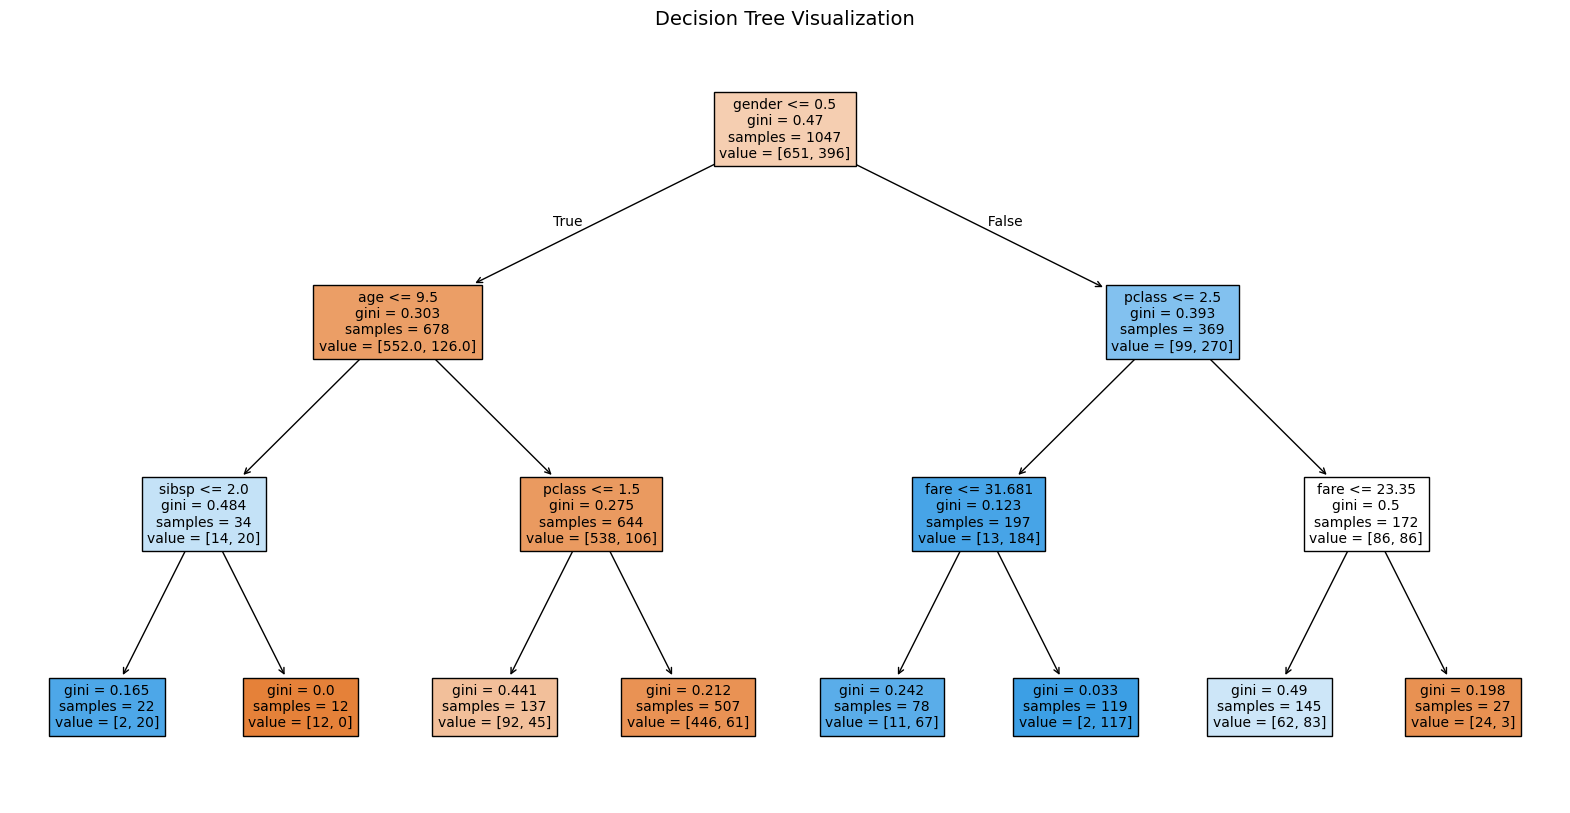

In [ ]:
# import matplotlib to visualize the decision tree
from matplotlib import pyplot as plt
from sklearn import tree

# plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(
    clf,
    filled=True,           
    feature_names=clf.feature_names_in_,
    fontsize=10
)
plt.title("Decision Tree Visualization", fontsize=14)
plt.show()



4. From the above plot, can you find the most important feature used by the decision tree? How did you identify the feature?

Answer:
The most important feature used by the decision tree is gender. This is evident because the gender feature appears at the top node of the tree. In a decision tree, the root node represents the feature that provides the highest information gain meaning it best splits the data initially. Therefore, the model considers gender the most significant factor.


5. Print the most important feature used by the model and check if your answer to (4) is correct.

In [ ]:
# get the most important feature after visualization
imp = clf.feature_importances_
imp_feature = sorted(imp,reverse=True)
feature_names = clf.feature_names_in_      # retrieve the names of the features used by the model

# create a dictionary mapping each feature name to its importance score
feature_dic = dict(zip(feature_names,imp))
sorted_features = sorted(feature_dic.items(), key=lambda x: x[1], reverse=True)
max = sorted_features[0]    # extract the most important feature (the one with the highest importance score)
print("Important features after depth=3:")
print(max)

Important features after depth=3:
('gender', 0.6417100589895746)


Answer:
Yes, both the code and the tree plot show that gender is the most important feature. It appears at the top of the tree and has the highest importance score, so both results match.

# 5. Add noise to the training data set

Add noise to the training set by randomly flipping the labels of the training set with `pFlip = 0.1`.

Complete the function `flip` that takes as argument `lab`, a single label (0/1) and performs a flip with probability `pFlip`. This can be done as follows: Generate a random value uniformly distributed between `0` and `1`. If the generated random value is less than `pFlip`, flip the label, i.e., convert `0` to `1` and vice-versa.
(HINT: Use the `random.rand()` function of `numpy` to generate uniform random values between `0` and `1`) [Access the documentation here](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html)

In [ ]:
# import numpy to add noise to training labels
import numpy as np
pNoise = 0.1


# define a function to flip the labels with probability pNoise
def flip(lab):
    random_number = np.random.rand(1)
    if(random_number[0]<pNoise):
        if(lab == 1):
            lab = 0
        else:
            lab = 1
    return lab
            

# the labels of training set are flipped with probability pNoise.
yn_train = y_train.apply(lambda x: flip(x))


# 6. Fit a Decision Tree classifier to the noisy dataset

Using this classifier, print

1. the mean accuracy on the training set and test set
2. the depth of the classifier tree
3. the two most important features used by the model to perform classification

In [ ]:
# train a new tree on noisy labels
clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train,yn_train)

# evaluate the model trained with noisy labels
accuracy_train = clf.score(X_train, yn_train)
accuracy_test = clf.score(X_test,y_test)
print("accuracy_test: ",accuracy_test)
print("accuracy_train: ",accuracy_train)

# get the depth of this tree
depth = clf.get_depth()
print("Depth: ",depth)

# check important feature 
imp = clf.feature_importances_
imp_feature = sorted(imp,reverse=True)
feature_names = clf.feature_names_in_

feature_dic = dict(zip(feature_names,imp))
sorted_features = sorted(feature_dic.items(), key=lambda x: x[1], reverse=True)
max_2 = sorted_features[:2] # extract the two most important feature (the top two with the high importance score)

print("Top 2 most important features:")
for name, score in max_2:
    print(f"{name}: {score}")



accuracy_test:  0.6679389312977099
accuracy_train:  0.9617956064947469
Depth:  24
Top 2 most important features:
age: 0.2883039885436532
fare: 0.27975430400510537


# 7. Observations

Repeat parts `5` and `6` atleast **5** times and write down your observations about the following.

1. How does the average accuracy on the training and test datasets vary before and adding noise to the training set.

Initially(Without adding noise):
accuracy_test:  0.7137404580152672
accuracy_train:  0.9713467048710601
Depth:  22
Top 2 most important features:
gender: 0.3125903098325174
fare: 0.24395431764305653

<Noise in the Data>
Test 1:
accuracy_train:  0.9531996179560649
accuracy_test:  0.6641221374045801
Depth:  23
Top 2 most important features:
fare: 0.3044090392559379
age: 0.29234677161250394

Test 2:
accuracy_train:  0.9598853868194842
accuracy_test:  0.6717557251908397
Depth:  26
Top 2 most important features:
age: 0.30723371326884025
fare: 0.3024542765128001

Test 3:
accuracy_train:  0.9503342884431709
accuracy_test:  0.7061068702290076
Depth:  25
Top 2 most important features:
fare: 0.3021628105834389
age: 0.2720403192545203

Test 4:
accuracy_train:  0.9598853868194842
accuracy_test:  0.6450381679389313
Depth:  22
Top 2 most important features:
fare: 0.2700687776984704
age: 0.26940661476668254

Test 5:
accuracy_train:  0.9579751671442216
accuracy_test:  0.6946564885496184
Depth:  31
Top 2 most important features:
age: 0.29385191649523723
fare: 0.2852760597596904

Test 6:
accuracy_train:  0.9598853868194842
accuracy_test:  0.7022900763358778
Depth:  20
Top 2 most important features:
age: 0.2931733610848317
fare: 0.2920857055792656

Conclusion:

Max depth increased to 31(Test5), which suggests overfitting in that noisy run.
Min depth decreased to 20(Test6), suggesting less confident splitting or earlier stopping.


2.  Does the average depth of the classifier tree vary before and adding noise to the training set? Explain.


Yes, the depth of the decision tree changes when noise is added to the dataset. This is primarily because the tree tries to adapt to inconsistencies in the data caused by noise especially in the target variable. 
When labels are flipped randomly the decision boundaries become less clear, and the tree may either grow deeper to memorize the data (overfitting), or it may grow shallower if it cannot find useful splits (underfitting). Therefore, depth can both increase and decrease depending on how the noise affects the structure and information gain at each split.

3.  Does the two most important features of the decision tree remain the same before and after adding noise to the training set?

Before adding noise to the trainig set the two most important features were gender and fare but after adding noise, the two important features became age and fare.

# 8. Train and test accuracy plot

Fit a decision tree classifier for different values of `max_depth`. Make a single line plot that shows the the training and test accuracies for each value of `max_depth`in the range **(3,10)**.

(HINT: Use `matplotlib.pyplot.plot()` to generate the line-plot.)

[Access the documentation here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

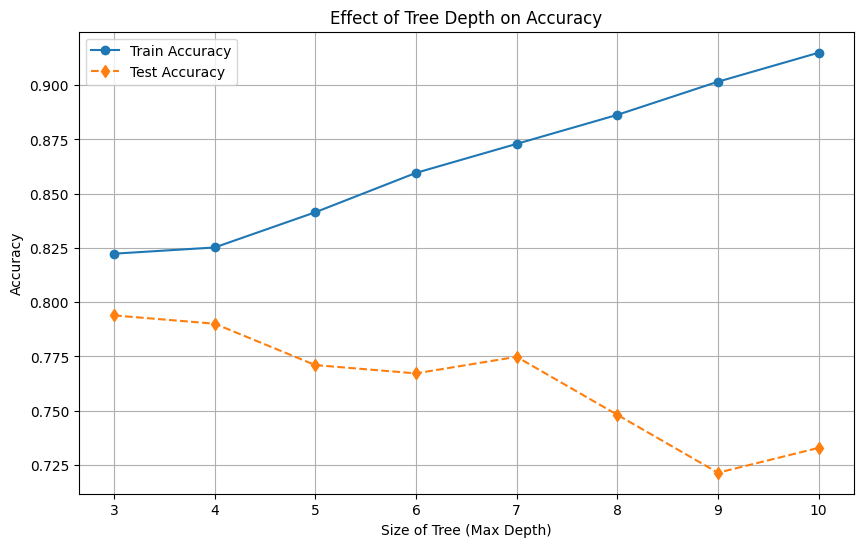

In [ ]:
# experiment with trees of different depths to see how accuracy varies
predict_train_list = []
predict_test_list = []
depth_list = []

# loop through various tree depths
for i in range(3,11):
    depth_list.append(i)
    clf = DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(X_train,y_train)    
    accuracy_train = clf.score(X_train, y_train)
    accuracy_test = clf.score(X_test,y_test)
    predict_train_list.append(accuracy_train)
    predict_test_list.append(accuracy_test)

# plot the training and testing accuracy vs tree depth
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(depth_list, predict_train_list, label="Train Accuracy", linestyle='-', color='C0',marker = 'o')
plt.plot(depth_list, predict_test_list, label="Test Accuracy", linestyle='--', color='C1', marker = 'd')

plt.xlabel("Size of Tree (Max Depth)")
plt.ylabel("Accuracy")
plt.title("Effect of Tree Depth on Accuracy")
plt.legend()
plt.grid(True)
plt.show()


---

# Evaluation Rubric

1.   Reading the data: **2.5 marks**
2.   Creating the train-test split: **2.5 marks**
3.   Train decision tree classifier: **25 marks**

    *     Fit decision tree - *5*
    *     Prediction on test set - *5*
    *     Mean accuracy - *5*
    *     Tree depth - *5*
    *     Important features - *5*

4.   Decision tree with `max_depth = 3`: **15 marks**
    *     Fit decison tree - *5*
    *     Comparison of accuracy - *2.5*
    *     Plotting the tree - *2.5*
    *     Finding the important feature from plot - *2.5*
    *     Identifying important features from model - *2.5*

5.    Add noise to dataset : **20 marks**

6.    Decision tree on noisy dataset : **10 marks**
    *     Fit decision tree - *2.5*     
    *     Mean accuracy - *2.5*
    *     Tree depth - *2.5*
    *     Important features - *2.5*

7.    Observations : **15 marks**
    *     Average accuracy - *5*
    *     Average depth - *5*
    *     Important features - *5*

8.   Train-test accuracy plot : **10 marks**

---



